<a href="https://colab.research.google.com/github/abduhsalam/Regression-Analyst/blob/master/Multi_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

problem multiple linear regression penjualan pie dengan 2 parameter independent yaitu Price dan Advertising untuk memprediksi pie sales

Goal : 
- analisis efek 2 paramater price dan advertising
- membangun model multi linear untuk prediksi pie sales

menggunakan liblary pandas, statsmodels, seaborn, matplotlib dan sklearn

In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


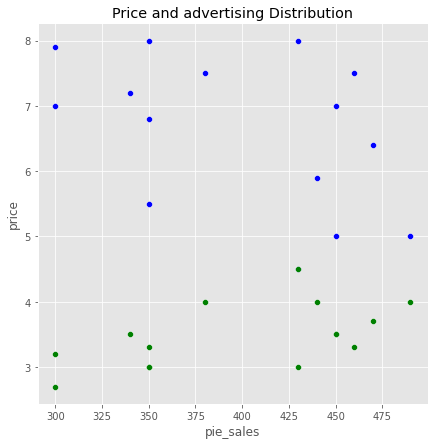

In [37]:
sns.scatterplot(x='pie_sales' ,y = "price",data= df_pie, color= "blue").set_title("Price and advertising Distribution")
sns.scatterplot(x='pie_sales' ,y = "advertising",data= df_pie, color= "green")

In [9]:
X = df_pie[['price','advertising']]
Y = df_pie['pie_sales']
week = df_pie['week']

In [6]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


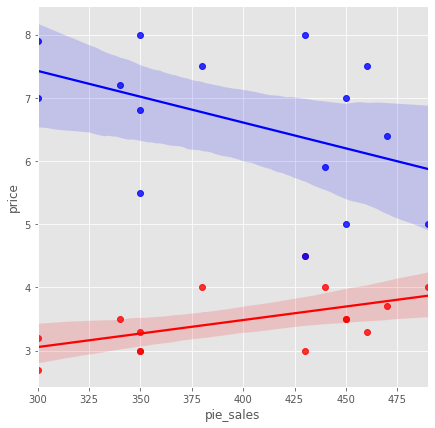

In [35]:
sns.regplot(x=df_pie.pie_sales, y=df_pie.advertising, color='red')
sns.regplot(x=df_pie.pie_sales, y=df_pie.price, color='blue')

Didapat nilai b1=-24.975 dan b2=74.131. 
dapat dilihat nilai b1 bernilai negatif hal ini menunjukan semakin rendah nilai harga semakin tinggi nilai penjualan, 
sedangkan nilai b2 bernilai positif menunjukan semakin tinggi nilai periklanan semakin tinggi nilai penjualan.

In [19]:
# prediction with sklearn
ads = 4
price = 6
print ('Predicted  pie sales with price : ',price,' and ads : ',ads,' \n', regr.predict([[price, ads]]))

Predicted  pie sales with price :  6  and ads :  4  
 [453.19948613]


In [7]:
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Thu, 22 Oct 2020   Prob (F-statistic):             0.0120
Time:                        08:55:09   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

# **Analisis Model**
